In [28]:
# 1. Librerías

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  # Ocultar warnings de Pandas/Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

sns.set_style('whitegrid')


In [31]:
# 2. Cargar datasets


# Train: contiene SalePrice
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train (1).csv')
# Test: solo para predicciones finales
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test (1).csv')

# Limpiar nombres de columnas por si hubiera espacios extra
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

# Verificar columnas
print("Train columnas:", train.columns.tolist())
print("Test columnas:", test.columns.tolist())
train.head()


Train columnas: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Poo

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


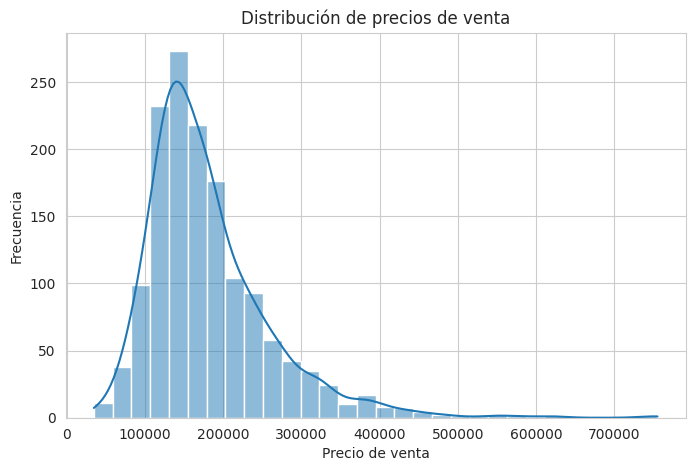

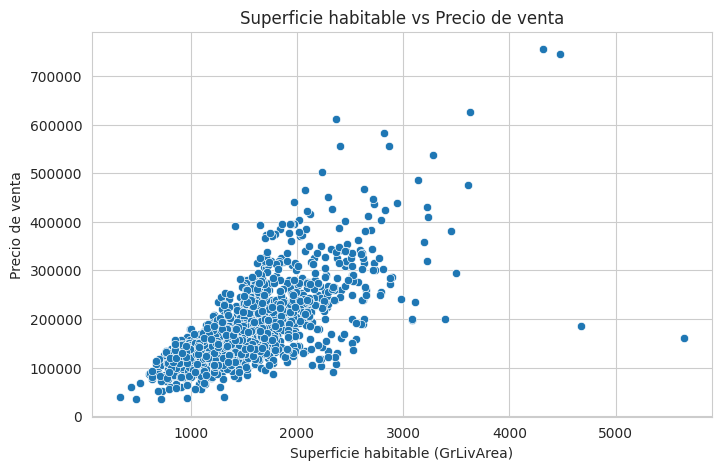

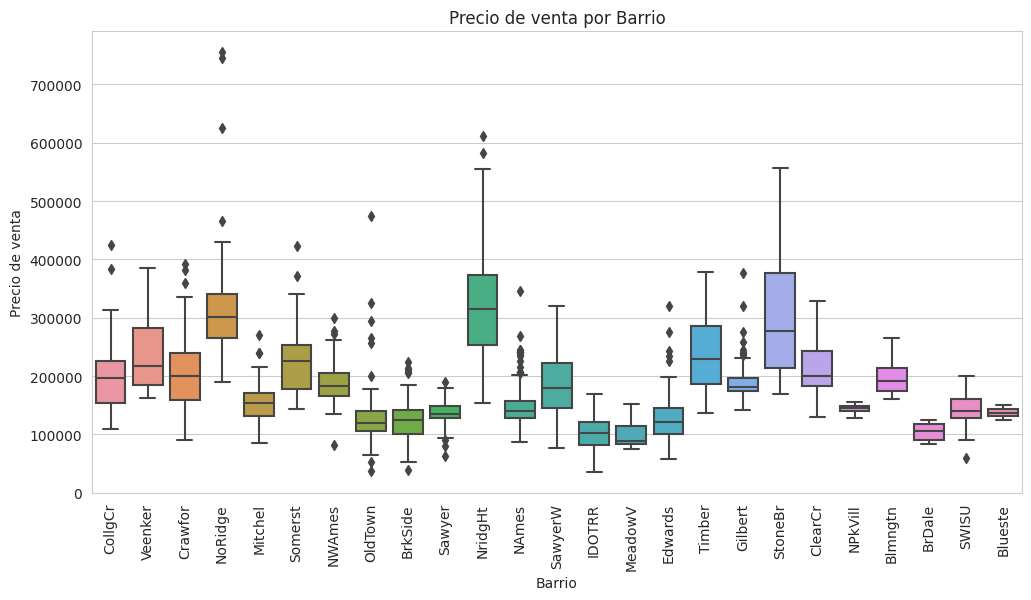

In [32]:
# 3. EDA (Exploratory Data Analysis)


# 3.1 Distribución de precios
plt.figure(figsize=(8,5))
sns.histplot(train['SalePrice'], bins=30, kde=True)
plt.title('Distribución de precios de venta')
plt.xlabel('Precio de venta')
plt.ylabel('Frecuencia')
plt.show()

# 3.2 Superficie habitable vs Precio
plt.figure(figsize=(8,5))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('Superficie habitable vs Precio de venta')
plt.xlabel('Superficie habitable (GrLivArea)')
plt.ylabel('Precio de venta')
plt.show()

# 3.3 Barrio vs Precio
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train)
plt.xticks(rotation=90)
plt.title('Precio de venta por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Precio de venta')
plt.show()


In [34]:
# 4. Preprocesamiento


# Separar features y target
X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']

# Columnas numéricas y categóricas
num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Pipelines para preprocesamiento
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])



In [35]:
# 5. Entrenamiento de modelo


# División de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
])

# Entrenar modelo
model.fit(X_train, y_train)

# Predicciones en validación
y_pred = model.predict(X_val)

# Métrica RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("RMSE en validación:", rmse)


RMSE en validación: 28512.645677520482


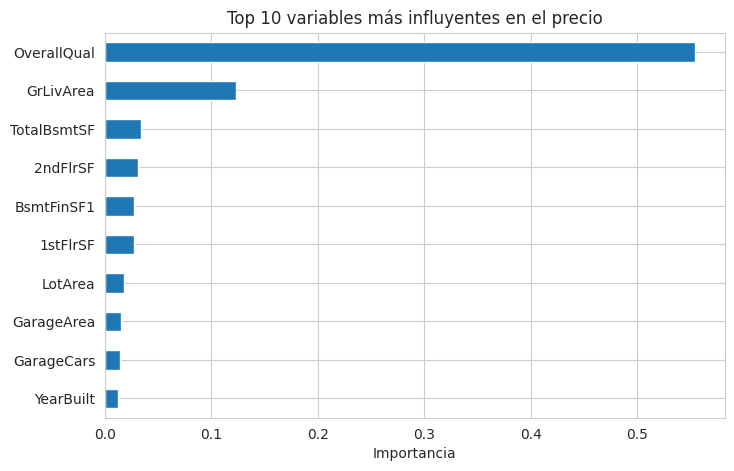

In [36]:
# 6. Importancia de variables


reg = model.named_steps['regressor']
ohe = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_names = ohe.get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_cols, cat_names])
importances = reg.feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)[:10]

plt.figure(figsize=(8,5))
feat_imp.plot(kind='barh')
plt.title('Top 10 variables más influyentes en el precio')
plt.xlabel('Importancia')
plt.gca().invert_yaxis()
plt.show()


In [37]:
/# 7. Predicción final en test.csv


# test.csv no tiene SalePrice
X_test = test.drop(['Id'], axis=1)
y_test_pred = model.predict(X_test)

# Generar archivo submission
submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': y_test_pred
})

submission.to_csv('submission.csv', index=False)
print("Archivo submission.csv generado")
submission.head()


Archivo submission.csv generado


,Id,SalePrice
0,1461,128171.165
1,1462,152918.875
2,1463,178716.000
3,1464,184652.675
4,1465,205193.500
